<center>

<h1> Prolog Basics </h1>
<h2> CS3100 Monsoon 2020 </h2>
</center>

## Review

### Previously 

* Functional Programming in **OCaml**

### Today

* Introduction to Logic Programming in **Prolog**

## Imperative programming

Computing the sum of the elements of an integer list in **Java**.

```java
int sum (int[] list) {
    int result = 0;
    for (int i = 0; i < list.length; i++)
        result += list[i];
    return result;
}
```

## Functional Programming

Computing the sum of the elements of an integer list in **OCaml**.

```ocaml
let rec sum l = match l with
  | [] -> 0
  | x::xs -> x + sum xs
```

## Logic Programming

Computing the sum of the elements of an integer list in **Prolog**.

In [2]:
sum([],0).
sum([H | T], N) :- sum(T,M), N is H+M.

Added 2 clauses(s).

Notice that this is a **declarative** reading of the sum of a list.

## Declarative vs Operational

* This Prolog program says **what** the sum of a list is.
  + OCaml and Java programs were about **how** to compute the sum.
* In particular, prolog program does not define **control flow** through the program.
  + program is a collection of **facts** and **rules**

## Prolog Program Answers Questions

```
            +-----------------+
Queries ==> |  Facts + Rules  | ==> Answers
            +-----------------+
               Prolog Program
```

Facts and rules together build up a database of relations.

## Relational view of the sum program

The program 

```prolog
sum([],0).
sum([H | T], N) :- sum(T,M), N is M+H.
```

inductively defines a table of relations:

```
+------------+
|    sum     |
|------------|
| ([], 0)    |
| ([1], 1)   |
| ([1,2], 3) |
| ([2], 2)   |
| ...        |
```

## Queries are look ups in this table

In [3]:
?- sum([1,2,3],X).

X = 6 .

Of course, the **computation model** is not to build a database and look up facts.

## Why this declarative view?

* Many problems in computer science are naturally expressed as declarative programs.
  + Rule-based AI, Program Analysis (asking questions on code), Type Inference, queries on graphical programs, UIs.
* But the programmer has to convert this to Von Neumann Architecture. 
  
<center>
    
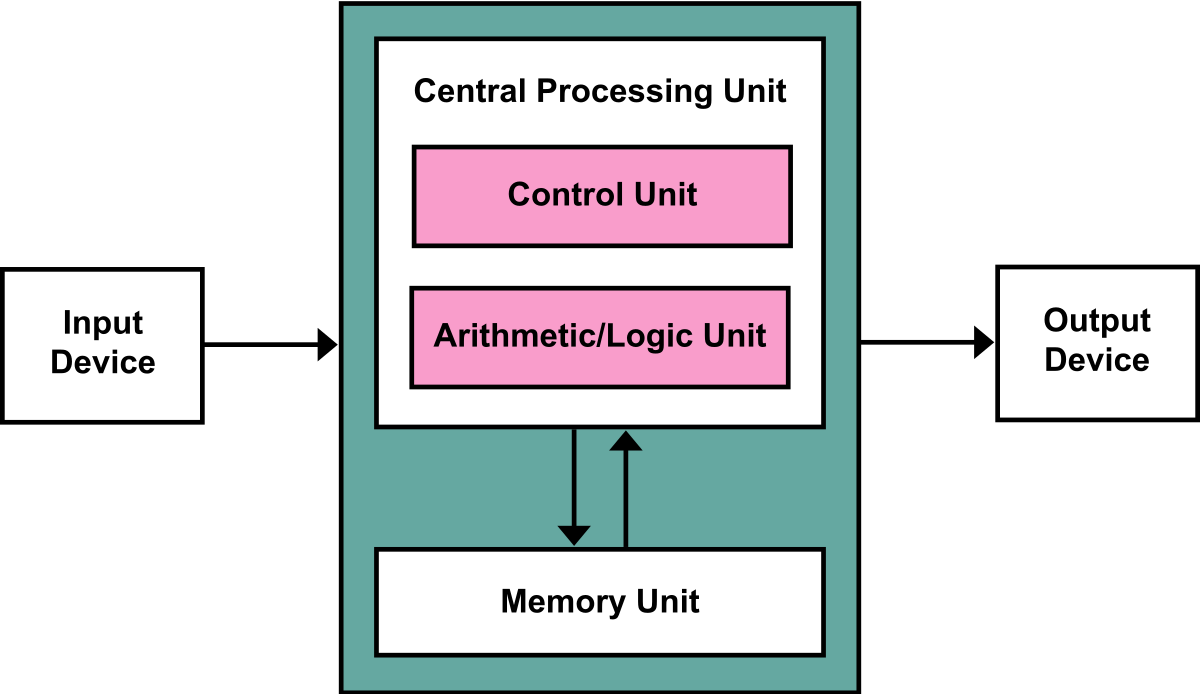
</center>

## Logic Programming to the rescue

* Logic programming the programmer to declaratively express the program
* The compiler will figure out how to compute the answers to the queries. 

```
  Prolog = Logic (programmer) + Control (compiler)
```

## Prolog

* Is one of the first logic programming languagues
  + to be precise, it is a family of languages that differ by the choice of **control**
* Invented in 1972, and has many different implementations
  + We will use **SWI-Prolog** for our study.

## Logic programming is alive and kicking

<br/>
<center>

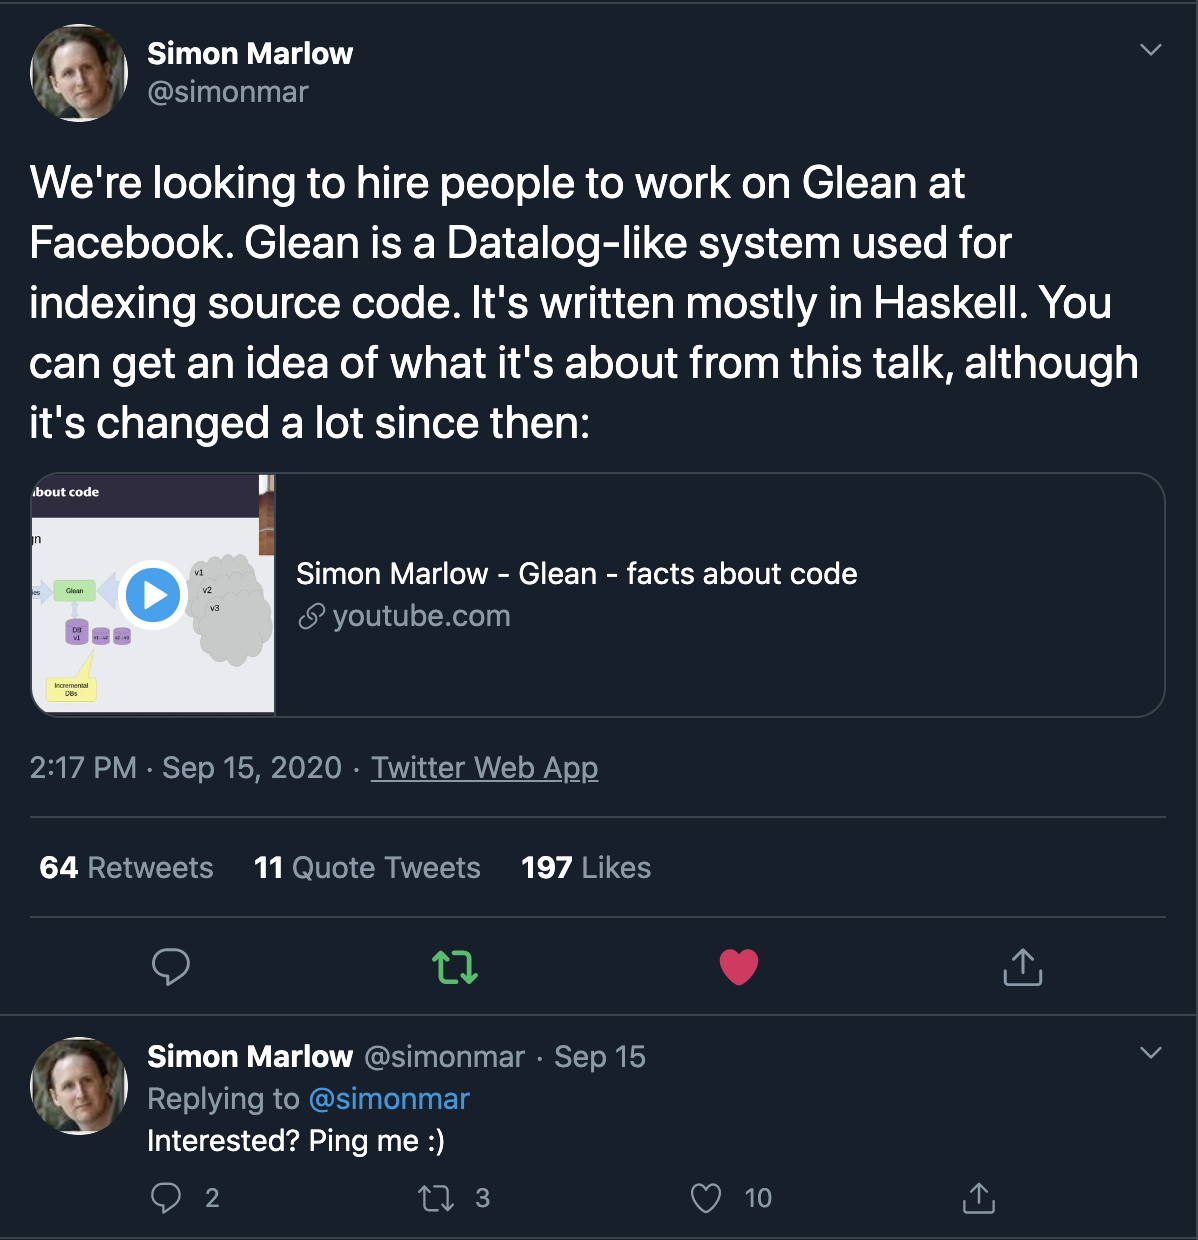
</center>

## Logic programming is alive and kicking

<br/>
<center>

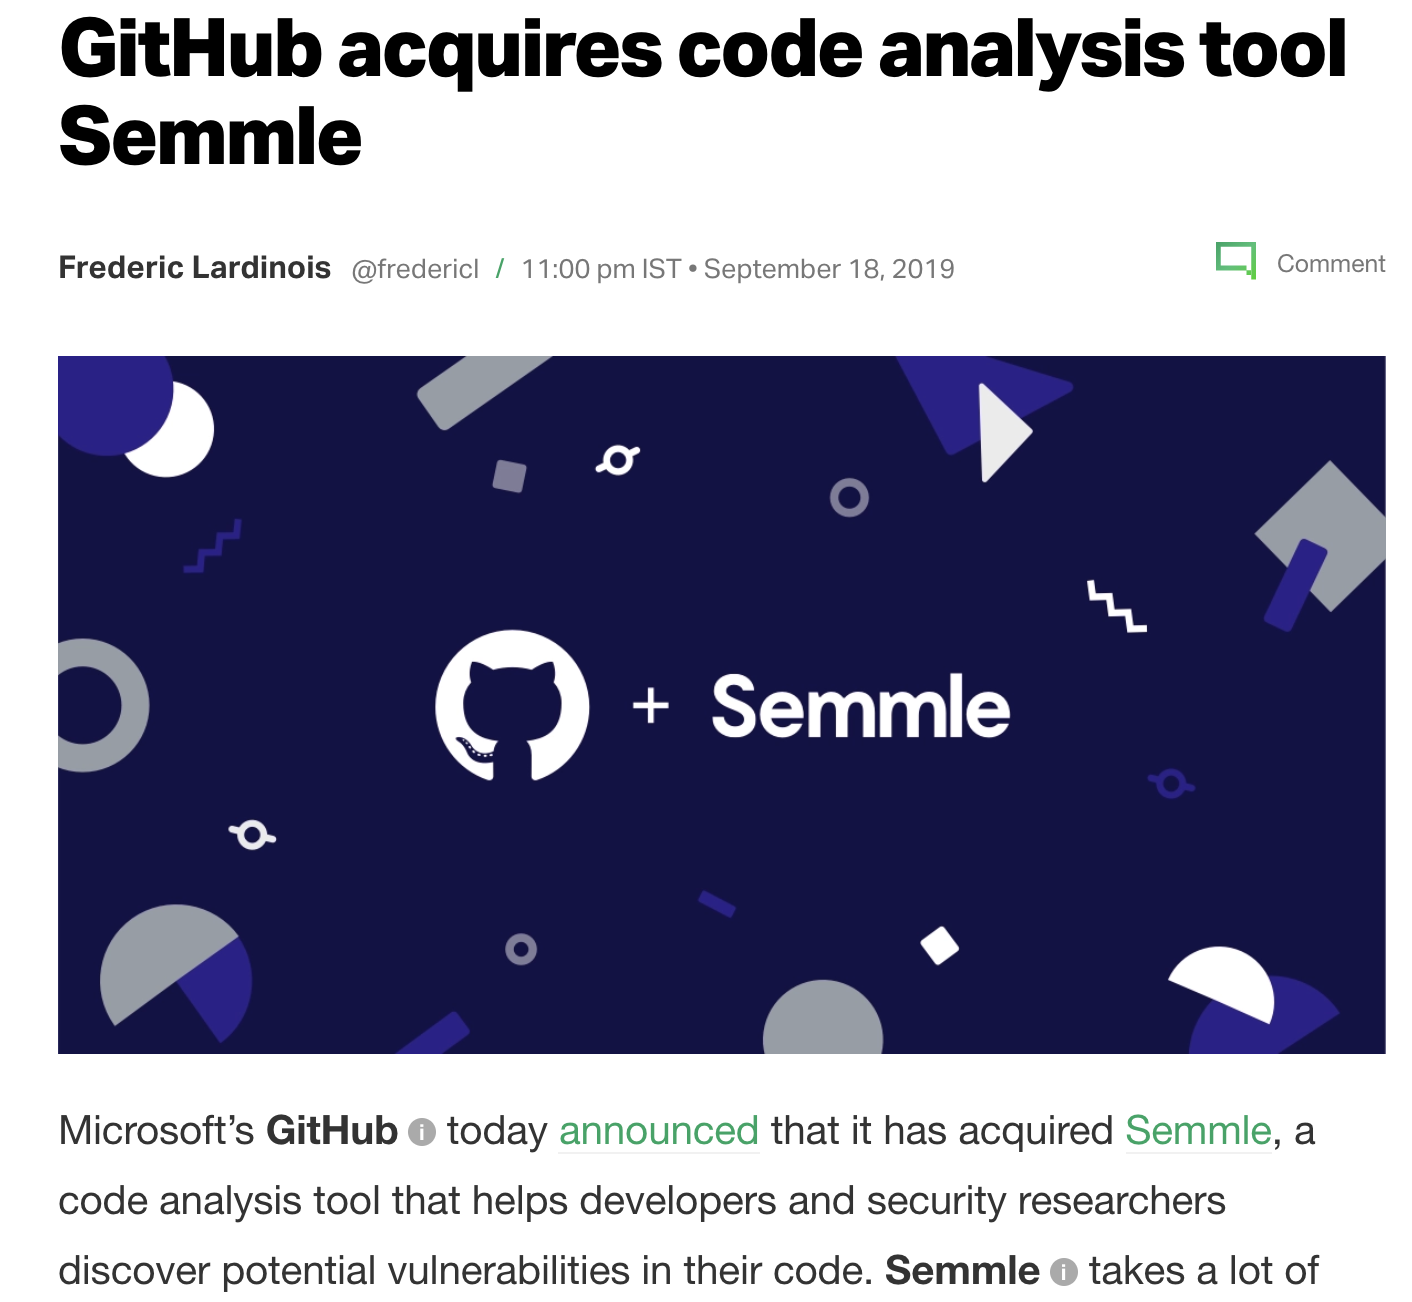
</center>

* Uses the QL query language is an object-oriented version of Datalog.

## Example: House Stark

* Prolog good at modelling relations
  + Let's model familial relationships.

<center>

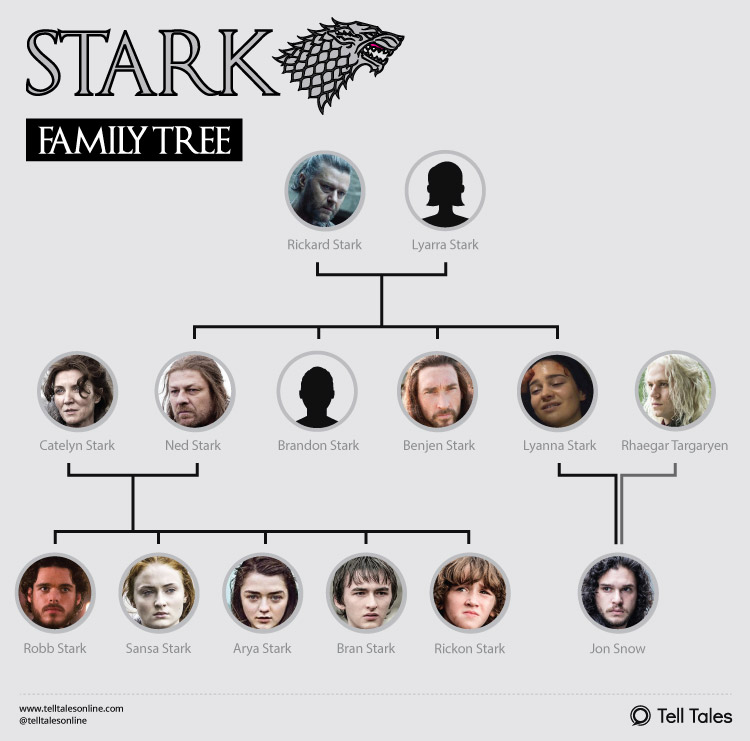
</center>

## Prolog Terms

Prolog programs are made up of **terms**.

* **Constants**: `1`,`2`,`3.14`,`robb`,`'House Stark'`, etc. 
  + also known as **atoms**.
* **Variables**: Always begin with a capital letter.
  + `X`, `Y`, `Sticks`, `_`.
* **compound terms**: `male(robb)`, `father(ned,robb)`.
  + **Top-function symbol/functor**: `male`, `father`
  + **arity**: Number of arguments; male = 1, father = 2.
  + Top function symbols also written down explicitly with arity such as `male/1`, `father/2`.

## House Stark -- Facts

In [4]:
father(rickard,ned).
father(rickard,brandon).
father(rickard,lyanna).
father(ned,robb).
father(ned,sansa).
father(ned,arya).

Added 6 clauses(s).

## House Start -- Queries

In [5]:
?- father(ned,sansa).

true.

In [6]:
?- father(rickard,sansa).

false.

## Closed world assumption

We know that Ned is the father of Bran.

Let us query our program.

In [7]:
?- father(ned,bran).

false.

* **Closed World Assumption:** Prolog only knows the fact that it has been told.
* Assumes `false` for everything else.
* Interesting interactions with negation (we will see this later).

## Existential Queries

* Apart from true/false questions, we can also ask queries that return other answers (**existential queries**).
  
"Who are Ned's children?"

In [8]:
?- father(ned, X).

X = robb ;
X = sansa ;
X = arya .

## Existential Queries

The concept of arguments and results is blurred in Prolog.

"Who is the father of Arya?"

In [9]:
?- father(X,arya).

X = ned .

"Who are Robb's children?"

In [12]:
?- father(robb,X).

false.

## Rules

* So far what we have done could have been done with a relational database.
  + Prolog is much more powerful thanks to **rules**.
* **Rules** define further facts _inductively_ from other facts and rules.
* Rules have a **head** and **body**.
  + `H :- B1, B2, B3, ..., BN`
  + $H$ is true if $B1 \wedge B2 \wedge B3 \ldots BN$ is true. 

## Rules

In [13]:
parent(X,Y) :- father(X,Y).
mother(catelyn,robb).
parent(X,Y) :- mother(X,Y).

ancestor(X,Y) :- parent(X,Y).
ancestor(X,Y) :- parent(X,Z), ancestor(Z,Y).

Added 5 clauses(s).

Observe that `Z` only appears on the RHS of the last rule.

## Rules

Who are the descendents of Rickard?

In [14]:
?- ancestor(rickard,X).

X = ned ;
X = brandon ;
X = lyanna ;
X = robb ;
X = sansa ;
X = arya .

## Exercise

Define `cousin`, `uncle`, `aunt`, `sibling` relationships.

## Quiz

In [15]:
material(gold).
material(aluminium).
process(bauxite,alumina).
process(alumina,aluminium).
process(copper, bronze).
valuable(X) :- material(X).
valuable(X) :- process(X,Y), valuable(Y).

Added 7 clauses(s).

* Which of these are valuable? 
  + gold, bauxite, bronze, copper.

## Quiz 

In [16]:
?- valuable(gold).
?- valuable(bauxite).
?- valuable(bronze).
?- valuable(copper).

true.
true.
false.
false.

## Unification

At the core of how Prolog computes is **Unification**.

There are 3 rules for unification:

1. Atoms unify if they are identical
  + `a` & `a` unify, but not `a` & `b`. 
2. Variables unify with anything.
3. Compound terms unfiy only if their top-function symbols and arities match and their arguments unify recursively. 
  

## Quiz

Which of these unify?

1. a & a    
2. a & b
3. a & A
4. a & B
5. tree(l,r) & A

## Quiz

Which of these unify?

1. a & a **yes**    
2. a & b **no**
3. a & A **yes**
4. a & B **yes**
5. tree(l,r) & A **yes**

## Quiz

Which of these unify?

1. tree(l,r) & tree(B,C)
2. tree(A,r) & tree(s,C)
3. tree(A,r) & tree(A,B)
4. A & a(A)
5. a & a(A)

## Quiz

Which of these unify?

1. tree(l,r) & tree(B,C) **yes**
2. tree(A,r) & tree(l,C) **yes**
3. tree(A,r) & tree(A,B) **yes**
4. A & a(A) **yes (mostly), occurs check disabled by default**
5. a & a(A) **no**

## Note about prolog notebooks

* There are no binders for the rules and facts in prolog.
  + This is unlike OCaml which has top-level definitions.
* Hence, you may see strange behaviours when working with the notebook.

## Note about notebooks

In [ ]:
stringofint(1,'one').

In [ ]:
?- stringofint(1,X).

Restart the kernel and run again if you find weird results. 

<center>

<h1> Fin. </h1>
</center>